In [62]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import base64
import numpy as np
from IPython.display import display, Image as IPImage
from PIL import Image
from io import BytesIO
import wave
from IPython.display import Image, display, Audio

In [63]:
from google.colab import userdata
#initiate api key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [64]:
#create ai client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [65]:
def generate_gemini_text(contents):
  response = client.models.generate_content(
      model="gemini-2.0-flash-lite",
      contents=contents,
      config=types.GenerateContentConfig(
        response_modalities=['TEXT', 'TEXT']
      )
  )
  for part in response.candidates[0].content.parts:
    if part.text is not None:
     return part.text



In [66]:
def generate_gemini_image(description):
  description += " in the comic book style of spiderman"
  response = client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=description,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)
  for part in response.candidates[0].content.parts:
    if part.inline_data is not None:
      image_data = part.inline_data.data
      return image_data # Return the image data

#for text to speech
def wave_file(filename, pcm, channels=1, rate=24000, sample_width=2):
   with wave.open(filename, "wb") as wf:
      wf.setnchannels(channels)
      wf.setsampwidth(sample_width)
      wf.setframerate(rate)
      wf.writeframes(pcm)


What should we make a comic about: star wars
How many panels should it be: 3


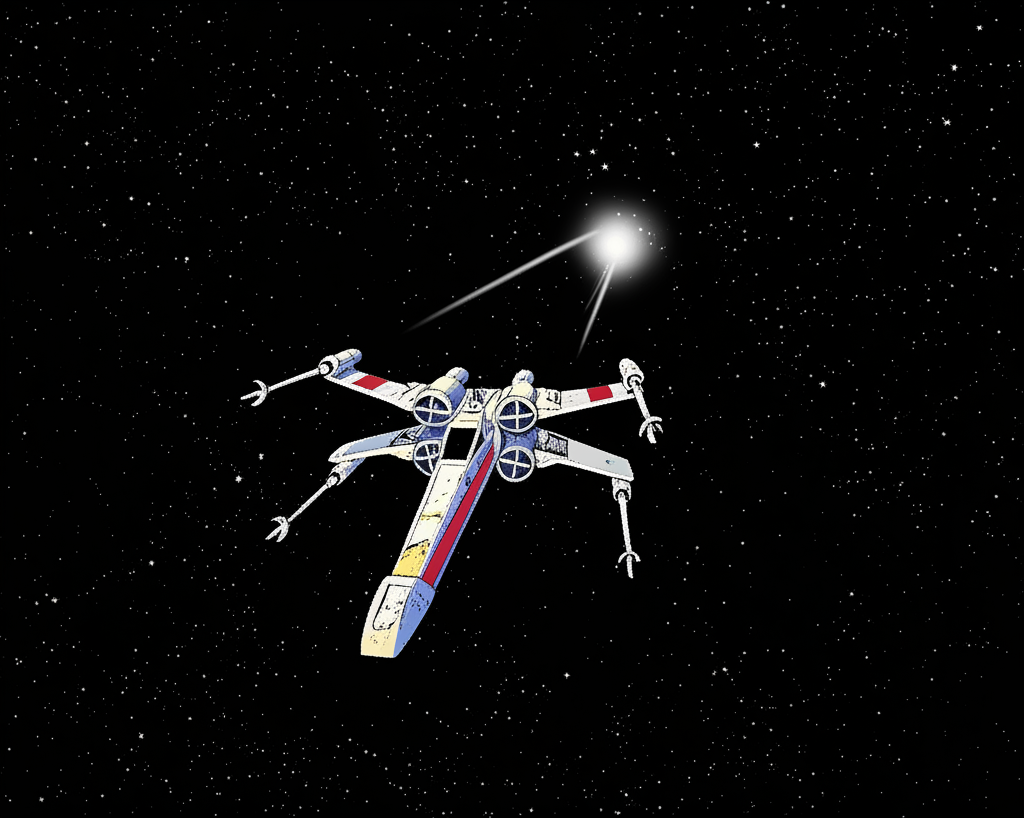

SPACE... the final frontier for anyone trying to outrun a Sith Lord.





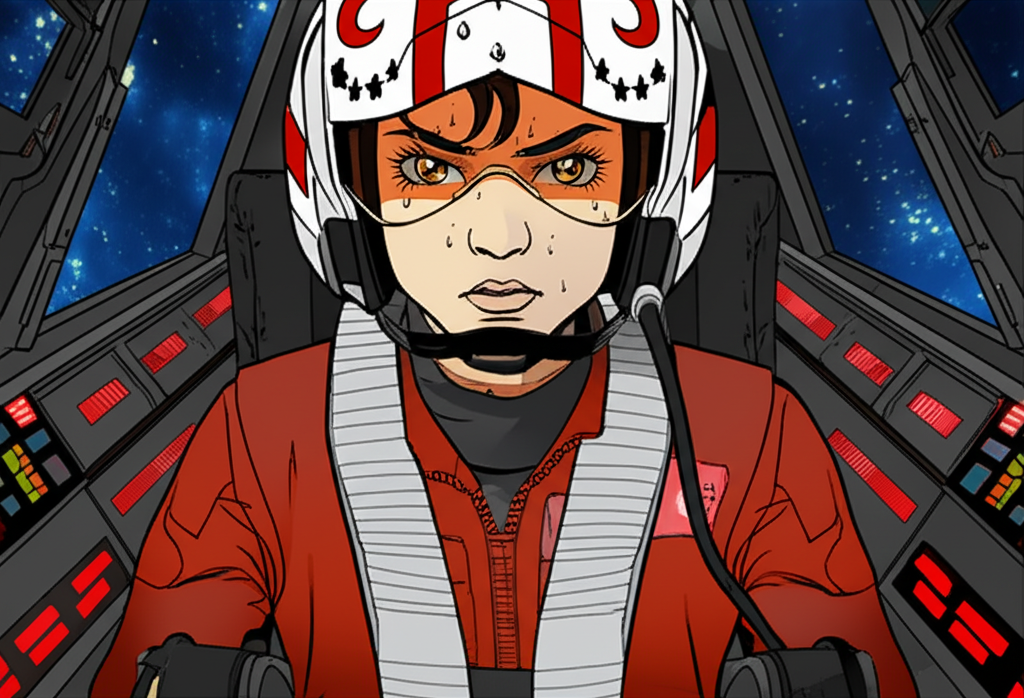

Blast it all! I'm losing shields!





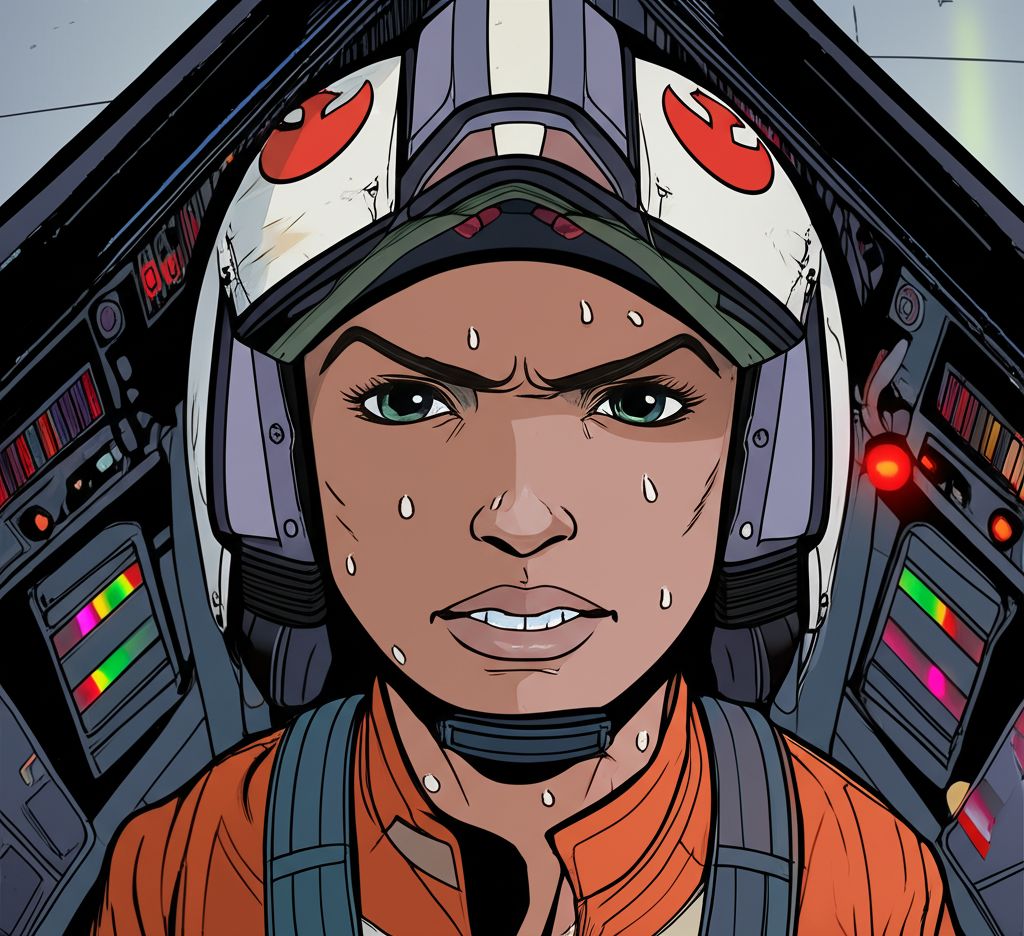

"Come on... hold together, baby!"





In [67]:
comic_topic = input("What should we make a comic about: ")
comic_panels = int(input("How many panels should it be: "))

panel_array = []
caption_array = []


for i in range(comic_panels):
  description = ("You are a comic strip writer, write panel number "+str(i) +" for a comic about "+comic_topic +" respond ONLY the description of the image in this first panel. and NO other text or speech panel")
  if i > 0:
    description += "keep in mind the previous panels "
    for k in range(i):
      description += "panel "+ str(k+1) + " was "+ panel_array[k]


  image_desc = generate_gemini_text(description)
  panel_array.append(image_desc)
  image_data = generate_gemini_image(image_desc)

  dialogue = ("You are a comic strip writer, write a caption for panel number "+str(i) +" for a comic about "+comic_topic +" respond ONLY the caption/dialogue of the image in this first panel. and NO other text. Keep in mindn that the image attached will be of "+image_desc)

  if i > 0:
    description += "keep in mind the previous panels captions. "
    for k in range(i):
      description += "panel "+ str(k+1) + " had the caption "+ caption_array[k]

  caption = generate_gemini_text(dialogue)
  caption_array.append(caption)


  display(IPImage(data=image_data))
  print(caption_array[-1])
  print("\n")


  tts_response = client.models.generate_content(
     model="gemini-2.5-flash-preview-tts",
     contents=caption,
     config=types.GenerateContentConfig(
        response_modalities=["AUDIO"],
        speech_config=types.SpeechConfig(
           voice_config=types.VoiceConfig(
              prebuilt_voice_config=types.PrebuiltVoiceConfig(
                 voice_name='Kore',
              )
           )
        ),
     )
  )


  audio_data = tts_response.candidates[0].content.parts[0].inline_data.data

  audio_filename = f'comic-panel-{i+1}-audio.wav'

  wave_file(audio_filename, audio_data)

  display(Audio(audio_filename, autoplay=False))

  print("\n")
